In [1]:
!git clone https://github.com/sajalgoyal113/data

Cloning into 'data'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.


In [2]:
cd data

/content/data


In [3]:
import pandas as pd
import numpy as np
import csv
import math

from matplotlib import pyplot as plt
from matplotlib import colors

data = pd.read_csv("binclass.csv")
data2 = pd.read_csv("binclassv2.csv")

class1 = data[data['y'] == 1]  #  binclass.csv data of positive classes
class2 = data[data['y'] == -1]  #  binclass.csv data of negative classes

class1_2 = data2[data2['y'] == 1]  #  binclassv2.csv data of positive classes
class2_2 = data2[data2['y'] == -1]  #  binclassv2.csv data of positive classes

Xp = np.vstack((class1['x1'].values, class1['x2'].values)).T
Xn = np.vstack((class2['x1'].values, class2['x2'].values)).T
X_1 = np.vstack((data['x1'].values, data['x2'].values)).T
y_1 = data['y']

Xp_2 = np.vstack((class1_2['x1'].values, class1_2['x2'].values)).T
Xn_2 = np.vstack((class2_2['x1'].values, class2_2['x2'].values)).T
X_2 = np.vstack((data2['x1'].values, data2['x2'].values)).T
y_2 = data2['y']

In [4]:
df = data[['x1', 'x2']]
xpp = class1[['x1', 'x2']].mean() 
xp = np.array([xpp['x1'],xpp['x2']])  # mean vector for positive classes 
xnn = class2[['x1', 'x2']].mean()
xn = np.array([xnn['x1'],xnn['x2']])  # mean vector for negative classes 

covp = 0
covn = 0
for i in range(len(class1)):
    covp = covp + (class1.iloc[i]['x1'] - xp[0])**2 +  (class2.iloc[i]['x2'] - xp[1])**2 
for i in range(len(class2)):
    covn = covn + (class2.iloc[i]['x1'] - xn[0])**2 +  (class2.iloc[i]['x2'] - xn[1])**2  
covp = covp/(2*len(class1))  # covariance for positive classes
covn = covn/(2*len(class2))  # covariance for negative classes
print(xp, xn, covp, covn)

[10.01145764 19.5495245 ] [20.32489     9.68799575] 67.58235788345071 9.500608154947216


In [5]:
# done similar process as above for binclassv2.csv data

df = data2[['x1', 'x2']]
xpp = class1_2[['x1', 'x2']].mean()
xp_2 = np.array([xpp['x1'],xpp['x2']]) 
xnn = class2_2[['x1', 'x2']].mean()
xn_2 = np.array([xnn['x1'],xnn['x2']])

covp_2 = 0
covn_2 = 0
for i in range(len(class1_2)):
    covp_2 = covp_2 + (class1_2.iloc[i]['x1'] - xp_2[0])**2 +  (class2_2.iloc[i]['x2'] - xp_2[1])**2 
for i in range(len(class2_2)):
    covn_2 = covn_2 + (class2_2.iloc[i]['x1'] - xn_2[0])**2 +  (class2_2.iloc[i]['x2'] - xn_2[1])**2  
covp_2 = covp_2/(2*len(class1_2))
covn_2 = covn_2/(2*len(class2_2))
print(xp_2, xn_2,covp_2, covn_2)

[10.57498364 18.5569005 ] [20.32489     9.68799575] 65.8564355756397 9.500608154947216


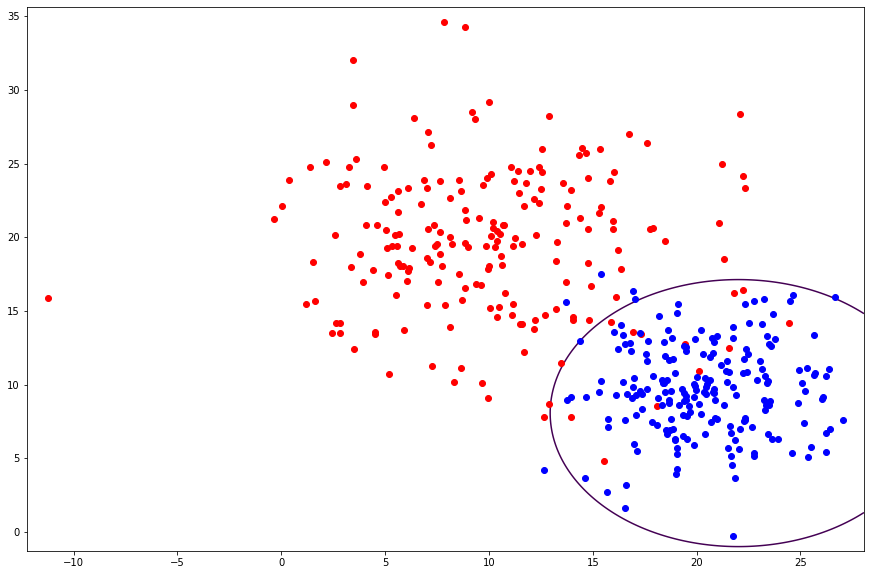

In [6]:
xmin, xmax = X_1[:, 0].min() - 1, X_1[:, 0].max() + 1
ymin, ymax = X_1[:, 1].min() - 1, X_1[:, 1].max() + 1
sp = 0.1
xx, yy = np.meshgrid(np.arange(xmin, xmax, sp),
                     np.arange(ymin, ymax, sp))  # defining the grid map on which we have to plot decision boundaries
temp = np.c_[xx.ravel(), yy.ravel()]  # transforming and combining the xx, yy as one numpy array for ease
arr = []  # defined empty list
formula = lambda x: np.dot(((x-xp)/covp).T, (x-xp) ) - np.dot(((x-xn)/covn).T, (x-xn) ) + 2*np.log(covp) - 2*np.log(covn)  # defined the formula for decision boundary for different gaussian class conditionals 
for i in temp: 
    dp = formula(i)  # getting decision boundary element for each ( x, y )
    arr.append(dp)   # appending the point to arr list
fig = plt.figure(figsize=(15, 10))  # defining figure size
plt.contour(xx,yy, np.array(arr).reshape(xx.shape), levels=[0])
plt.scatter(Xp[:, 0], Xp[:, 1], cmap=plt.cm.binary, zorder=2, color=['red'])  ## plotting red positive points
plt.scatter(Xn[:, 0], Xn[:, 1], cmap=plt.cm.binary, zorder=2, color=['blue']) ## plotting blue negative points
plt.show()


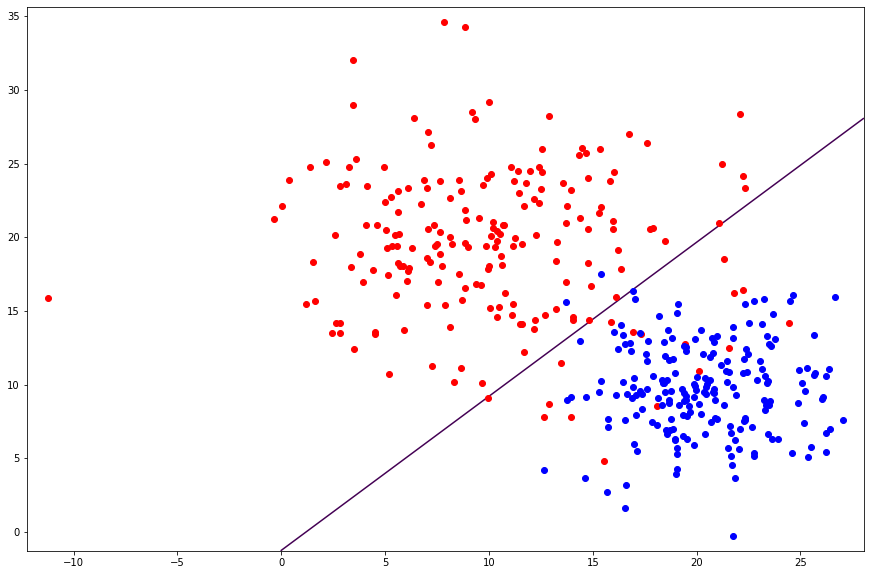

In [7]:
xmin, xmax = X_1[:, 0].min() - 1, X_1[:, 0].max() + 1
ymin, ymax = X_1[:, 1].min() - 1, X_1[:, 1].max() + 1
sp = 0.1
xx, yy = np.meshgrid(np.arange(xmin, xmax, sp),
                     np.arange(ymin, ymax, sp))
temp = np.c_[xx.ravel(), yy.ravel()]
arr = []
formula = lambda x: np.dot(((x-xp)).T, (x-xp) ) - np.dot(((x-xn)).T, (x-xn) )  # defined the formula for decision boundary for same gaussian class conditionals 
for i in temp:
    dp = formula(i)
    arr.append(dp)
fig = plt.figure(figsize=(15, 10))
plt.contour(xx,yy, np.array(arr).reshape(xx.shape), levels=[0])
plt.scatter(Xp[:, 0], Xp[:, 1], cmap=plt.cm.binary, zorder=2, color=['red'])  
plt.scatter(Xn[:, 0], Xn[:, 1], cmap=plt.cm.binary, zorder=2, color=['blue'])
plt.show()

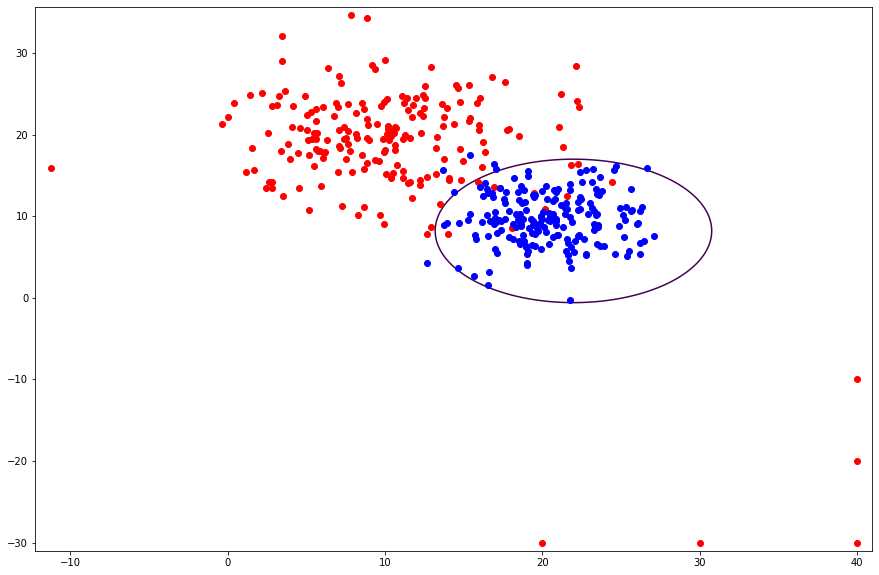

In [8]:
xmin, xmax = X_2[:, 0].min() - 1, X_2[:, 0].max() + 1
ymin, ymax = X_2[:, 1].min() - 1, X_2[:, 1].max() + 1
sp = 0.1
xx, yy = np.meshgrid(np.arange(xmin, xmax, sp),
                     np.arange(ymin, ymax, sp))
temp = np.c_[xx.ravel(), yy.ravel()]
arr = []
formula = lambda x: np.dot(((x-xp_2)/covp_2).T, (x-xp_2) ) - np.dot(((x-xn_2)/covn_2).T, (x-xn_2) ) + 2*np.log(covp_2) - 2*np.log(covn_2)
for i in temp:
    dp = formula(i)
    arr.append(dp)
fig = plt.figure(figsize=(15, 10))
plt.contour(xx,yy, np.array(arr).reshape(xx.shape), levels=[0])
plt.scatter(Xp_2[:, 0], Xp_2[:, 1], cmap=plt.cm.binary, zorder=2, color=['red'])
plt.scatter(Xn_2[:, 0], Xn_2[:, 1], cmap=plt.cm.binary, zorder=2, color=['blue'])
plt.show()

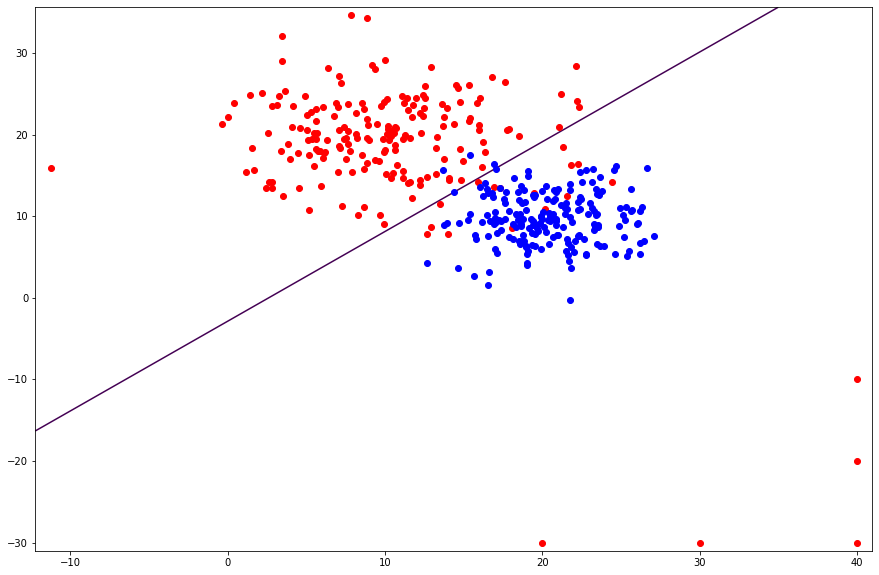

In [9]:
xmin, xmax = X_2[:, 0].min() - 1, X_2[:, 0].max() + 1
ymin, ymax = X_2[:, 1].min() - 1, X_2[:, 1].max() + 1
sp = 0.1
xx, yy = np.meshgrid(np.arange(xmin, xmax, sp),
                     np.arange(ymin, ymax, sp))
temp = np.c_[xx.ravel(), yy.ravel()]
arr = []
formula = lambda x: np.dot(((x-xp_2)).T, (x-xp_2) ) - np.dot(((x-xn_2)).T, (x-xn_2) )
for i in temp:
    dp = formula(i)
    arr.append(dp)
fig = plt.figure(figsize=(15, 10))
plt.contour(xx,yy, np.array(arr).reshape(xx.shape), levels=[0])
plt.scatter(Xp_2[:, 0], Xp_2[:, 1], cmap=plt.cm.binary, zorder=2, color=['red'])
plt.scatter(Xn_2[:, 0], Xn_2[:, 1], cmap=plt.cm.binary, zorder=2, color=['blue'])
plt.show()